In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
advertise=pd.read_csv("Advertising1.csv",usecols=[1,2,3,4])

In [3]:
advertise.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertise.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
advertise.shape

(200, 4)

In [6]:
advertise.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertise.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
(advertise==0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [10]:
advertise.Sales.value_counts()

Sales
9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: count, Length: 121, dtype: int64

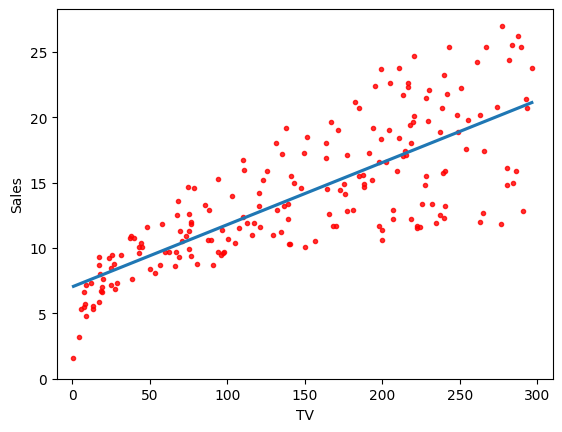

In [11]:
sns.regplot(data=advertise,x='TV',y='Sales',order=1,ci=None,scatter_kws={'color':'r','s':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

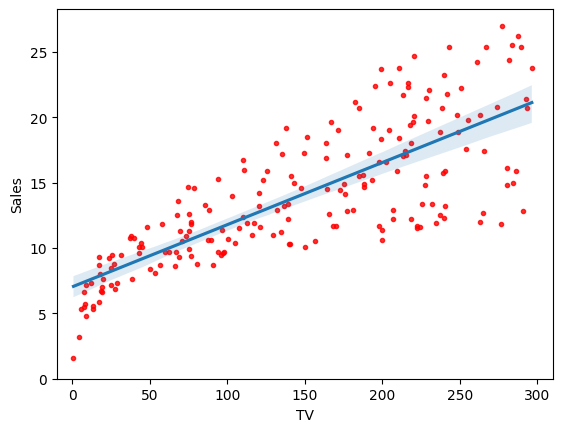

In [12]:
sns.regplot(data=advertise,x='TV',y='Sales',order=1,ci=99,scatter_kws={'color':'r','s':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

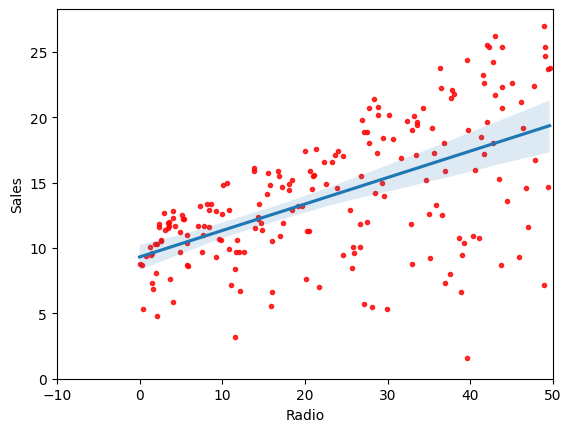

In [13]:
sns.regplot(data=advertise,x='Radio',y='Sales',order=1,ci=99,scatter_kws={'color':'r','s':9})
plt.xlim(-10,50)
plt.ylim(bottom=0)
plt.show()

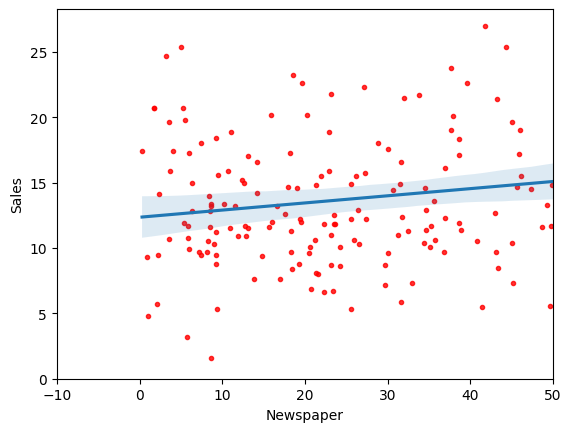

In [14]:
sns.regplot(data=advertise,x='Newspaper',y='Sales',order=1,ci=99,scatter_kws={'color':'r','s':9})
plt.xlim(-10,50)
plt.ylim(bottom=0)
plt.show()

In [15]:
import sklearn.linear_model as ski_lm
regr=ski_lm.LinearRegression()
x=advertise.TV.values.reshape(-1,1)
y=advertise.Sales

In [16]:
regr.fit(x,y)

LinearRegression()

In [17]:
regr.intercept_

7.032593549127695

In [18]:
regr.coef_

array([0.04753664])

In [19]:
min_rss=np.sum((regr.intercept_+regr.coef_*x-y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [20]:
mse=min_rss/len(y)
mse

10.512652915656757

# R Square

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
Sales_pred=regr.predict(x)

In [23]:
r2_score(y,Sales_pred)

0.611875050850071

In [24]:
mean_squared_error(y,Sales_pred)

10.512652915656757

# summary

In [25]:
import statsmodels.formula.api as smf

In [26]:
est=smf.ols('Sales~ TV',advertise).fit()

In [27]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        21:58:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


In [29]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

# RSS


In [30]:
((advertise.Sales-(est.params[0]+est.params[1]*advertise.TV))**2).sum()

C:\Users\jeetk\AppData\Local\Temp\ipykernel_7768\2657190759.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((advertise.Sales-(est.params[0]+est.params[1]*advertise.TV))**2).sum()


2102.5305831313512

In [31]:
est2=smf.ols('Sales~ Radio',advertise).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           4.35e-19
Time:                        21:58:48   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(est2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [33]:
est3=smf.ols('Sales~ Newspaper',advertise).fit()
est3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00115
Time:                        21:58:48   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print(est3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [35]:
est4=smf.ols('Sales~TV+Radio+Newspaper',advertise).fit()
print(est4.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
